In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate 50 simulated users
num_users = 50
num_legitimate_logins = 7000
num_attack_logins = 3000
total_logins = num_legitimate_logins + num_attack_logins

# Create user profiles
user_ids = [f"user_{i:03d}" for i in range(1, num_users + 1)]

In [3]:
# Define device types
device_types = [
    "Desktop PC", "Laptop", "Smartphone", "Tablet", "Smart TV",
    "Smart Speaker", "Smart Watch", "Smart Thermostat", "Smart Lock",
    "IP Camera", "Smart Refrigerator", "Game Console", "Smart Plug",
    "Smart Bulb", "Smart Car"
]

# Define locations
locations = [
    "Home", "Office", "Coffee Shop", "Airport", "Hotel", "Friend's House",
    "Shopping Mall", "Gym", "Restaurant", "Library", "Park", "School",
    "Transit", "Vacation Home", "Conference Center", "Medical Center",
    "Entertainment Venue", "Retail Store", "Industrial Facility", "Data Center",
    "Rural Area", "Suburban Area", "Urban Center", "International Location",
    "University Campus", "Government Building", "Financial Institution",
    "Sports Stadium", "Beach", "Mountain Retreat"
]


In [4]:
# Create user preferences and behavioral patterns
user_profiles = {}
for user_id in user_ids:
    # Each user has 1-3 preferred devices
    num_preferred_devices = random.randint(1, 3)
    preferred_devices = random.sample(device_types, num_preferred_devices)

    # Each user has 1-5 common locations
    num_common_locations = random.randint(1, 5)
    common_locations = random.sample(locations, num_common_locations)

    # User's typical login times (in hours, 0-23)
    # Most users have specific patterns of when they log in
    morning_preference = random.random() < 0.7  # 70% of users log in during morning
    afternoon_preference = random.random() < 0.6  # 60% of users log in during afternoon
    evening_preference = random.random() < 0.8  # 80% of users log in during evening
    night_preference = random.random() < 0.3  # 30% of users log in during night

    active_hours = []
    if morning_preference:
        active_hours.extend(range(6, 12))
    if afternoon_preference:
        active_hours.extend(range(12, 18))
    if evening_preference:
        active_hours.extend(range(18, 22))
    if night_preference:
        active_hours.extend(list(range(22, 24)) + list(range(0, 6)))

    if not active_hours:  # Ensure at least some active hours
        active_hours = list(range(9, 18))

    # Behavioral biometrics - create baseline patterns
    # Keystroke dynamics (fictional metrics)
    keystroke_press_duration = np.random.normal(150, 20)  # milliseconds
    keystroke_interval = np.random.normal(200, 30)  # milliseconds
    keystroke_rhythm_consistency = np.random.uniform(0.7, 0.95)

    # Mouse movement patterns (fictional metrics)
    mouse_speed = np.random.normal(500, 100)  # pixels per second
    mouse_acceleration = np.random.normal(200, 50)  # pixels per second^2
    mouse_curvature = np.random.uniform(0.1, 0.9)  # 0=straight lines, 1=curved
    mouse_direction_changes = np.random.normal(12, 4)  # changes per minute

    user_profiles[user_id] = {
        "preferred_devices": preferred_devices,
        "common_locations": common_locations,
        "active_hours": active_hours,
        "keystroke_press_duration": keystroke_press_duration,
        "keystroke_interval": keystroke_interval,
        "keystroke_rhythm_consistency": keystroke_rhythm_consistency,
        "mouse_speed": mouse_speed,
        "mouse_acceleration": mouse_acceleration,
        "mouse_curvature": mouse_curvature,
        "mouse_direction_changes": mouse_direction_changes
    }

In [6]:
# Generate legitimate login attempts (corrected version)
legitimate_logins = []
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = (end_date - start_date).days

for _ in range(num_legitimate_logins):
    # Choose a random user
    user_id = random.choice(user_ids)
    profile = user_profiles[user_id]

    # Generate timestamp within date range
    random_day = random.randint(0, date_range)
    date = start_date + timedelta(days=random_day)

    # Choose hour based on user's active hours (90% in active hours, 10% outside)
    if random.random() < 0.9 and profile["active_hours"]:
        hour = random.choice(profile["active_hours"])
    else:
        other_hours = [h for h in range(24) if h not in profile["active_hours"]]
        if other_hours:
            hour = random.choice(other_hours)
        else:
            hour = random.randint(0, 23)  # fallback if no "other" hours
    date = date.replace(hour=hour, minute=random.randint(0, 59), second=random.randint(0, 59))

    # Choose device (mostly preferred devices)
    if random.random() < 0.85 and profile["preferred_devices"]:
        device = random.choice(profile["preferred_devices"])
    else:
        other_devices = [d for d in device_types if d not in profile["preferred_devices"]]
        if other_devices:
            device = random.choice(other_devices)
        else:
            device = random.choice(device_types)  # fallback

    # Choose location (mostly common locations)
    if random.random() < 0.9 and profile["common_locations"]:
        location = random.choice(profile["common_locations"])
    else:
        other_locations = [l for l in locations if l not in profile["common_locations"]]
        if other_locations:
            location = random.choice(other_locations)
        else:
            location = random.choice(locations)  # fallback

    # Network characteristics
    network_type = random.choice(["Home WiFi", "Work WiFi", "Public WiFi", "Mobile Data", "Ethernet"])
    connection_speed = random.randint(5, 200)  # Mbps

    # Behavioral biometrics with some natural variation
    keystroke_press_duration = max(0, np.random.normal(profile["keystroke_press_duration"], 10))
    keystroke_interval = max(0, np.random.normal(profile["keystroke_interval"], 15))
    keystroke_rhythm_consistency = min(1, max(0, np.random.normal(profile["keystroke_rhythm_consistency"], 0.05)))

    mouse_speed = max(0, np.random.normal(profile["mouse_speed"], 50))
    mouse_acceleration = max(0, np.random.normal(profile["mouse_acceleration"], 25))
    mouse_curvature = min(1, max(0, np.random.normal(profile["mouse_curvature"], 0.1))
    )
    mouse_direction_changes = max(0, np.random.normal(profile["mouse_direction_changes"], 2))

    # Input speed (words per minute)
    input_speed = max(0, np.random.normal(60, 15))

    # Previous access history (number of successful logins in past week)
    previous_access = random.randint(1, 30)

    legitimate_logins.append({
        "user_id": user_id,
        "timestamp": date,
        "device_type": device,
        "location": location,
        "network_type": network_type,
        "connection_speed": connection_speed,
        "keystroke_press_duration": keystroke_press_duration,
        "keystroke_interval": keystroke_interval,
        "keystroke_rhythm_consistency": keystroke_rhythm_consistency,
        "mouse_speed": mouse_speed,
        "mouse_acceleration": mouse_acceleration,
        "mouse_curvature": mouse_curvature,
        "mouse_direction_changes": mouse_direction_changes,
        "input_speed": input_speed,
        "previous_access": previous_access,
        "is_legitimate": True,
        "attack_type": None
    })


In [8]:
# Generate attack login attempts (corrected version)
attack_types = ["Stolen Passwords", "Session Hijacking", "Replay Attacks",
                "Impersonation", "Man-in-the-Middle"]

attack_logins = []
for _ in range(num_attack_logins):
    # Choose a random user to attack
    user_id = random.choice(user_ids)
    profile = user_profiles[user_id]

    # Generate timestamp within date range
    random_day = random.randint(0, date_range)
    date = start_date + timedelta(days=random_day)

    # Attackers often don't know the user's patterns
    if random.random() < 0.7:
        other_hours = [h for h in range(24) if h not in profile["active_hours"]]
        if other_hours:
            hour = random.choice(other_hours)
        else:
            hour = random.randint(0, 23)  # fallback if no "other" hours
    else:
        if profile["active_hours"]:
            hour = random.choice(profile["active_hours"])
        else:
            hour = random.randint(0, 23)  # fallback if no active hours

    date = date.replace(hour=hour, minute=random.randint(0, 59), second=random.randint(0, 59))

    # Attackers might not use the user's common devices
    if random.random() < 0.6:
        other_devices = [d for d in device_types if d not in profile["preferred_devices"]]
        if other_devices:
            device = random.choice(other_devices)
        else:
            device = random.choice(device_types)  # fallback
    else:
        if profile["preferred_devices"]:
            device = random.choice(profile["preferred_devices"])
        else:
            device = random.choice(device_types)  # fallback

    # Attackers usually aren't at the user's common locations
    if random.random() < 0.8:
        other_locations = [l for l in locations if l not in profile["common_locations"]]
        if other_locations:
            location = random.choice(other_locations)
        else:
            location = random.choice(locations)  # fallback
    else:
        if profile["common_locations"]:
            location = random.choice(profile["common_locations"])
        else:
            location = random.choice(locations)  # fallback

    # Network characteristics
    network_type = random.choice(["Home WiFi", "Work WiFi", "Public WiFi", "Mobile Data", "Ethernet"])
    connection_speed = random.randint(5, 200)  # Mbps

    # Behavioral biometrics for attackers
    variation_factor = random.uniform(1.5, 3.0)  # how different the attacker's patterns are

    keystroke_press_duration = max(0, profile["keystroke_press_duration"] * random.uniform(0.5, 1.5))
    keystroke_interval = max(0, profile["keystroke_interval"] * random.uniform(0.5, 1.5))
    keystroke_rhythm_consistency = min(1, max(0, profile["keystroke_rhythm_consistency"] * random.uniform(0.5, 0.9)))

    mouse_speed = max(0, profile["mouse_speed"] * random.uniform(0.6, 1.4))
    mouse_acceleration = max(0, profile["mouse_acceleration"] * random.uniform(0.6, 1.4))
    mouse_curvature = min(1, max(0, 1 - abs(profile["mouse_curvature"] - 0.5) * random.uniform(0.8, 1.2)))
    mouse_direction_changes = max(0, profile["mouse_direction_changes"] * random.uniform(0.7, 1.3))

    # Input speed (words per minute) - attackers might be slower
    input_speed = max(0, np.random.normal(40, 20))

    # Previous access history - attackers often have fewer previous successful logins
    previous_access = random.randint(0, 5)

    # Assign an attack type
    attack_type = random.choice(attack_types)

    attack_logins.append({
        "user_id": user_id,
        "timestamp": date,
        "device_type": device,
        "location": location,
        "network_type": network_type,
        "connection_speed": connection_speed,
        "keystroke_press_duration": keystroke_press_duration,
        "keystroke_interval": keystroke_interval,
        "keystroke_rhythm_consistency": keystroke_rhythm_consistency,
        "mouse_speed": mouse_speed,
        "mouse_acceleration": mouse_acceleration,
        "mouse_curvature": mouse_curvature,
        "mouse_direction_changes": mouse_direction_changes,
        "input_speed": input_speed,
        "previous_access": previous_access,
        "is_legitimate": False,
        "attack_type": attack_type
    })



In [9]:
# Combine legitimate and attack login attempts
all_logins = legitimate_logins + attack_logins
random.shuffle(all_logins)  # Shuffle to mix legitimate and attack logins

# Convert to DataFrame
df = pd.DataFrame(all_logins)

# Create some derived features that would be used in risk assessment
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['is_business_hours'] = df['hour_of_day'].apply(lambda x: 1 if 9 <= x <= 17 else 0)

# Create feature to indicate if device is preferred for that user
df['is_preferred_device'] = df.apply(lambda row: 1 if row['device_type'] in user_profiles[row['user_id']]['preferred_devices'] else 0, axis=1)

# Create feature to indicate if location is common for that user
df['is_common_location'] = df.apply(lambda row: 1 if row['location'] in user_profiles[row['user_id']]['common_locations'] else 0, axis=1)

# Create feature to indicate if login time is typical for that user
df['is_typical_hour'] = df.apply(lambda row: 1 if row['hour_of_day'] in user_profiles[row['user_id']]['active_hours'] else 0, axis=1)

# Display information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of legitimate logins: {len(legitimate_logins)}")
print(f"Number of attack logins: {len(attack_logins)}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset shape: (10000, 24)
Number of legitimate logins: 7000
Number of attack logins: 3000

First 5 rows of the dataset:
    user_id           timestamp   device_type               location  \
0  user_010 2023-10-22 21:54:56  Game Console  Financial Institution   
1  user_011 2023-10-10 21:43:43  Game Console             Restaurant   
2  user_003 2023-10-05 06:27:09        Tablet             Restaurant   
3  user_017 2023-04-15 02:11:52    Smart Lock    Government Building   
4  user_042 2023-02-14 10:19:00        Tablet  Financial Institution   

  network_type  connection_speed  keystroke_press_duration  \
0  Public WiFi               131                122.061175   
1    Home WiFi                37                149.854113   
2  Mobile Data                84                112.777071   
3    Work WiFi                92                154.655509   
4  Mobile Data                10                154.719656   

   keystroke_interval  keystroke_rhythm_consistency  mouse_speed  ...  \


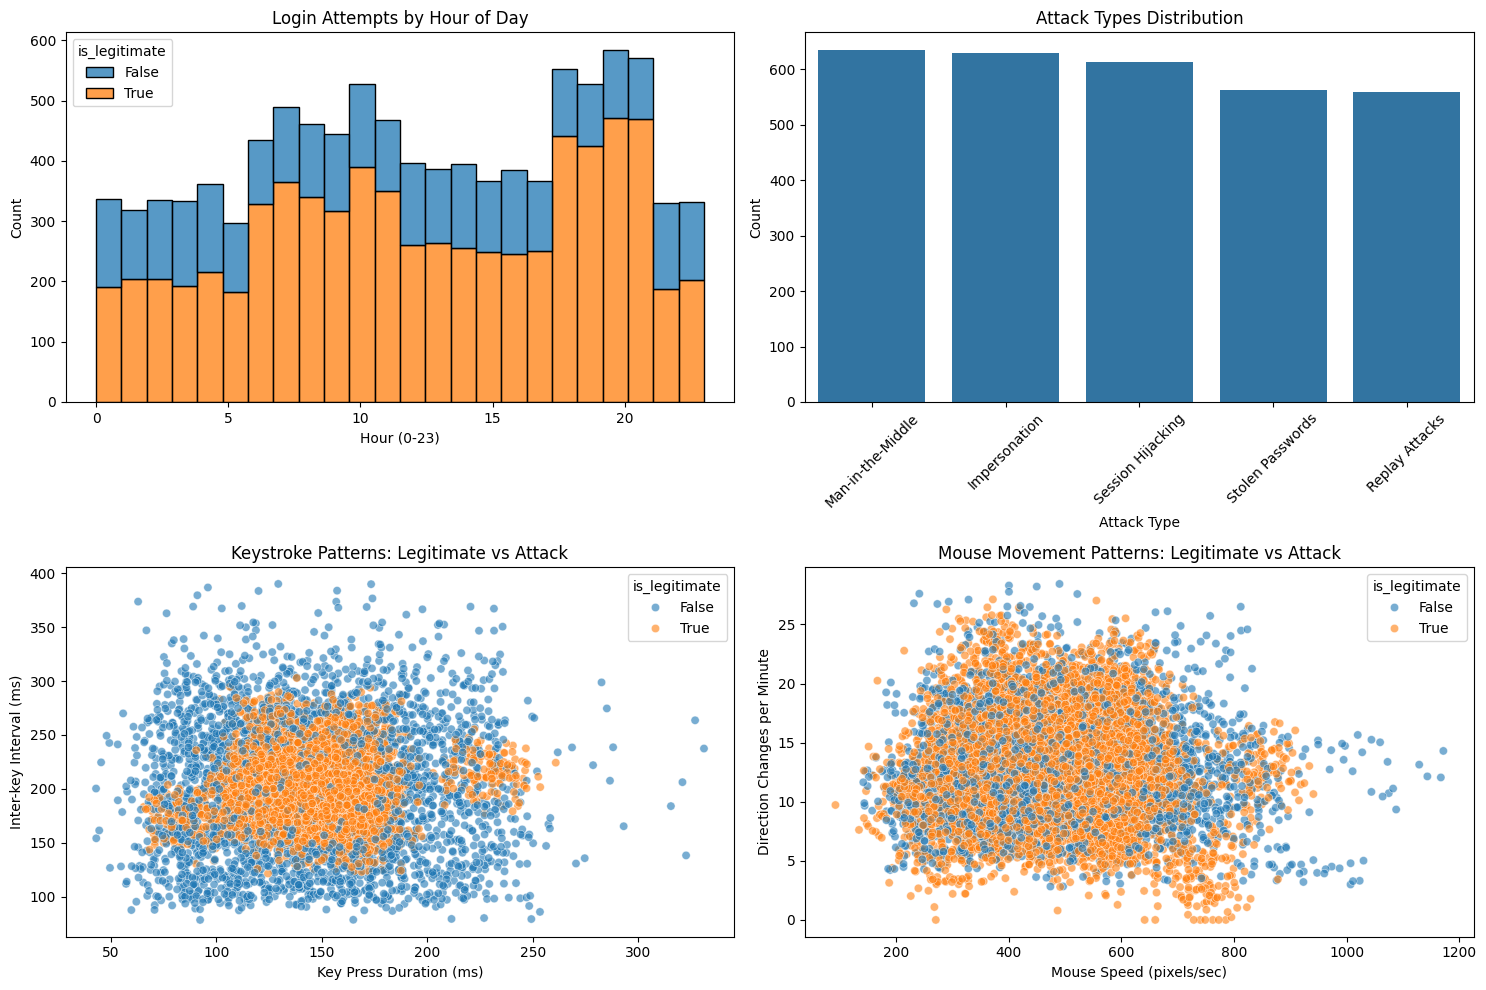


Dataset saved to 'synthetic_authentication_data.csv'


In [10]:
# Visualize aspects of the data
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of login attempts by hour of day
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='hour_of_day', hue='is_legitimate', multiple='stack', bins=24)
plt.title('Login Attempts by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Count')

# Plot 2: Distribution of attack types
plt.subplot(2, 2, 2)
attack_counts = df[df['is_legitimate'] == False]['attack_type'].value_counts()
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Attack Types Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot 3: Keystroke patterns comparison
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='keystroke_press_duration', y='keystroke_interval', hue='is_legitimate', alpha=0.6)
plt.title('Keystroke Patterns: Legitimate vs Attack')
plt.xlabel('Key Press Duration (ms)')
plt.ylabel('Inter-key Interval (ms)')

# Plot 4: Mouse movement patterns comparison
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='mouse_speed', y='mouse_direction_changes', hue='is_legitimate', alpha=0.6)
plt.title('Mouse Movement Patterns: Legitimate vs Attack')
plt.xlabel('Mouse Speed (pixels/sec)')
plt.ylabel('Direction Changes per Minute')

plt.tight_layout()
plt.show()

# Save the dataset to CSV
df.to_csv('synthetic_authentication_data.csv', index=False)
print("\nDataset saved to 'synthetic_authentication_data.csv'")

In [11]:
# Prepare data for machine learning model (Random Forest as described in the thesis)
# Select relevant features
features = [
    'hour_of_day', 'day_of_week', 'is_weekend', 'is_business_hours',
    'is_preferred_device', 'is_common_location', 'is_typical_hour',
    'keystroke_press_duration', 'keystroke_interval', 'keystroke_rhythm_consistency',
    'mouse_speed', 'mouse_acceleration', 'mouse_curvature', 'mouse_direction_changes',
    'input_speed', 'previous_access'
]

X = df[features]
y = df['is_legitimate']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate feature correlations with legitimacy
correlations = []
for i, feature in enumerate(features):
    correlation = np.corrcoef(X[feature], y)[0, 1]
    correlations.append((feature, abs(correlation)))

# Sort correlations by strength
correlations.sort(key=lambda x: x[1], reverse=True)

print("\nFeature importance based on correlation with legitimacy:")
for feature, correlation in correlations:
    print(f"{feature}: {correlation:.4f}")

# Create risk scores based on feature contributions
# This simulates the output of the Random Forest model described in the thesis
df['risk_score'] = 0

# Add contribution from unusual login time
df.loc[df['is_typical_hour'] == 0, 'risk_score'] += np.random.uniform(0.25, 0.30)

# Add contribution from unusual location
df.loc[df['is_common_location'] == 0, 'risk_score'] += np.random.uniform(0.20, 0.25)

# Add contribution from unfamiliar device
df.loc[df['is_preferred_device'] == 0, 'risk_score'] += np.random.uniform(0.15, 0.20)

# Add contribution from behavioral biometrics (keystroke patterns)
df['keystroke_score'] = abs(df['keystroke_press_duration'] - df.apply(lambda row: user_profiles[row['user_id']]['keystroke_press_duration'], axis=1)) / 100
df['risk_score'] += df['keystroke_score'] * np.random.uniform(0.05, 0.10)

# Add contribution from behavioral biometrics (mouse patterns)
df['mouse_score'] = abs(df['mouse_speed'] - df.apply(lambda row: user_profiles[row['user_id']]['mouse_speed'], axis=1)) / 500
df['risk_score'] += df['mouse_score'] * np.random.uniform(0.05, 0.10)

# Add contribution from previous access history
df.loc[df['previous_access'] < 5, 'risk_score'] += np.random.uniform(0.05, 0.10)

# Add some random noise
df['risk_score'] += np.random.normal(0, 0.05, size=len(df))

# Ensure risk score is between 0 and 1
df['risk_score'] = df['risk_score'].clip(0, 1)


Feature importance based on correlation with legitimacy:
keystroke_rhythm_consistency: 0.7705
is_common_location: 0.6989
previous_access: 0.6280
is_typical_hour: 0.5754
mouse_curvature: 0.5515
input_speed: 0.4827
is_preferred_device: 0.4446
hour_of_day: 0.0766
keystroke_interval: 0.0160
is_business_hours: 0.0151
mouse_direction_changes: 0.0137
mouse_speed: 0.0111
mouse_acceleration: 0.0103
day_of_week: 0.0050
is_weekend: 0.0029
keystroke_press_duration: 0.0021


<ipython-input-11-3432fbfea726>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.28237511 0.28237511 0.28237511 ... 0.28237511 0.28237511 0.28237511]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['is_typical_hour'] == 0, 'risk_score'] += np.random.uniform(0.25, 0.30)



Risk assessment accuracy: 0.8974
Precision: 0.9569
Recall: 0.6890
F1 Score: 0.8012


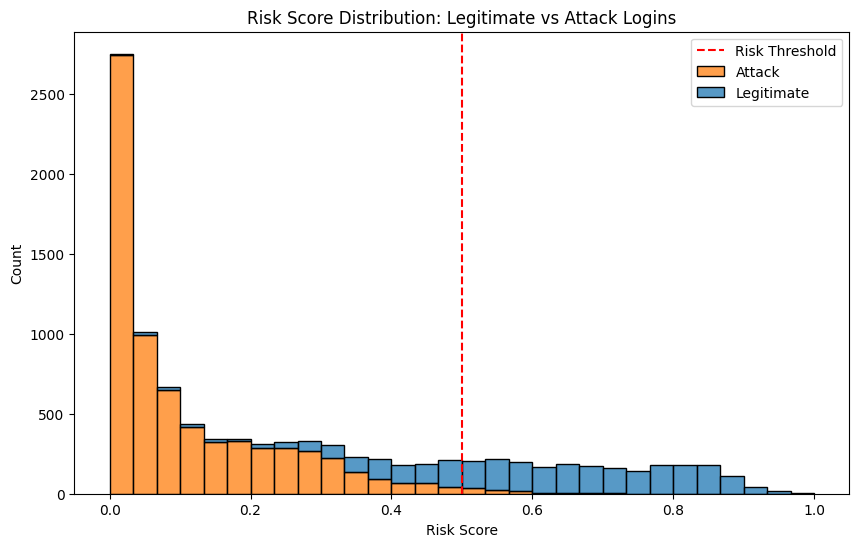

In [12]:
# Evaluate risk assessment accuracy
risk_threshold = 0.5
df['predicted_risk'] = df['risk_score'] > risk_threshold
df['correct_prediction'] = df['predicted_risk'] == ~df['is_legitimate']

accuracy = df['correct_prediction'].mean()
print(f"\nRisk assessment accuracy: {accuracy:.4f}")

# Calculate precision and recall
true_positives = sum((df['predicted_risk'] == True) & (df['is_legitimate'] == False))
false_positives = sum((df['predicted_risk'] == True) & (df['is_legitimate'] == True))
false_negatives = sum((df['predicted_risk'] == False) & (df['is_legitimate'] == False))

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Plot risk score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='risk_score', hue='is_legitimate', bins=30, multiple='stack')
plt.axvline(x=risk_threshold, color='r', linestyle='--')
plt.title('Risk Score Distribution: Legitimate vs Attack Logins')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.legend(['Risk Threshold', 'Attack', 'Legitimate'])
plt.show()

In [13]:
# Combine legitimate and attack login records
full_logins = legitimate_logins + attack_logins

# Convert to pandas DataFrame
df = pd.DataFrame(full_logins)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Quick check
df.head()



,user_id,timestamp,device_type,location,network_type,connection_speed,keystroke_press_duration,keystroke_interval,keystroke_rhythm_consistency,mouse_speed,mouse_acceleration,mouse_curvature,mouse_direction_changes,input_speed,previous_access,is_legitimate,attack_type
0,user_018,2023-04-08 19:29:36,Game Console,Coffee Shop,Home WiFi,97,144.359103,214.668855,0.979154,380.153778,297.913210,0.732801,6.487892,88.729096,29,True,None
1,user_047,2023-08-25 02:56:10,Tablet,Vacation Home,Mobile Data,54,130.329307,188.912777,0.960152,362.509785,143.141752,0.703896,15.185037,52.019361,20,True,None
2,user_020,2023-11-10 00:59:38,Smart Lock,Coffee Shop,Public WiFi,153,140.088835,201.102652,0.960514,402.312430,244.833143,0.284375,6.866702,57.311960,15,True,None
3,user_045,2023-04-10 20:05:55,IP Camera,International Location,Public WiFi,11,162.741755,166.818369,0.814502,602.404314,223.567209,0.092008,10.187004,66.481712,7,True,None
4,user_021,2023-04-17 16:05:13,Desktop PC,Beach,Work WiFi,21,130.944087,208.150262,0.857375,618.144346,226.176232,0.086480,8.446126,53.501922,23,True,None


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       10000 non-null  object        
 1   timestamp                     10000 non-null  datetime64[ns]
 2   device_type                   10000 non-null  object        
 3   location                      10000 non-null  object        
 4   network_type                  10000 non-null  object        
 5   connection_speed              10000 non-null  int64         
 6   keystroke_press_duration      10000 non-null  float64       
 7   keystroke_interval            10000 non-null  float64       
 8   keystroke_rhythm_consistency  10000 non-null  float64       
 9   mouse_speed                   10000 non-null  float64       
 10  mouse_acceleration            10000 non-null  float64       
 11  mouse_curvature              

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}

for column in ["device_type", "location", "network_type", "attack_type"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))  # fill NaNs with 'nan'
    label_encoders[column] = le  # Save encoder for later (important!)

df.head()


,user_id,timestamp,device_type,location,network_type,connection_speed,keystroke_press_duration,keystroke_interval,keystroke_rhythm_consistency,mouse_speed,mouse_acceleration,mouse_curvature,mouse_direction_changes,input_speed,previous_access,is_legitimate,attack_type
0,user_018,2023-04-08 19:29:36,1,2,1,97,144.359103,214.668855,0.979154,380.153778,297.913210,0.732801,6.487892,88.729096,29,True,2
1,user_047,2023-08-25 02:56:10,14,29,2,54,130.329307,188.912777,0.960152,362.509785,143.141752,0.703896,15.185037,52.019361,20,True,2
2,user_020,2023-11-10 00:59:38,6,2,3,153,140.088835,201.102652,0.960514,402.312430,244.833143,0.284375,6.866702,57.311960,15,True,2
3,user_045,2023-04-10 20:05:55,2,13,3,11,162.741755,166.818369,0.814502,602.404314,223.567209,0.092008,10.187004,66.481712,7,True,2
4,user_021,2023-04-17 16:05:13,0,1,4,21,130.944087,208.150262,0.857375,618.144346,226.176232,0.086480,8.446126,53.501922,23,True,2


In [17]:
# Define feature columns
feature_cols = [
    "device_type", "location", "network_type", "connection_speed",
    "keystroke_press_duration", "keystroke_interval", "keystroke_rhythm_consistency",
    "mouse_speed", "mouse_acceleration", "mouse_curvature", "mouse_direction_changes",
    "input_speed", "previous_access"
]

# Inputs and outputs
X = df[feature_cols]
y = df["is_legitimate"]


In [18]:
# Define feature columns
feature_cols = [
    "device_type", "location", "network_type", "connection_speed",
    "keystroke_press_duration", "keystroke_interval", "keystroke_rhythm_consistency",
    "mouse_speed", "mouse_acceleration", "mouse_curvature", "mouse_direction_changes",
    "input_speed", "previous_access"
]

# Inputs and outputs
X = df[feature_cols]
y = df["is_legitimate"]


In [20]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train
risk_model = RandomForestClassifier(n_estimators=100, random_state=42)
risk_model.fit(X_train, y_train)

# Predictions
y_pred = risk_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.98      0.99      0.99       600
        True       1.00      0.99      0.99      1400

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [22]:
# Select only keystroke-related features
keystroke_features = [
    "keystroke_press_duration",
    "keystroke_interval",
    "keystroke_rhythm_consistency"
]

X_keystroke = df[keystroke_features]
y_keystroke = df["is_legitimate"]

# Split into train/test
Xk_train, Xk_test, yk_train, yk_test = train_test_split(
    X_keystroke, y_keystroke, test_size=0.2, random_state=42, stratify=y_keystroke
)


In [23]:
from sklearn.svm import SVC

# Initialize and train SVM
keystroke_model = SVC(kernel="rbf", probability=True, random_state=42)
keystroke_model.fit(Xk_train, yk_train)

# Predictions
yk_pred = keystroke_model.predict(Xk_test)

# Evaluate
print(classification_report(yk_test, yk_pred))


              precision    recall  f1-score   support

       False       0.82      0.59      0.69       600
        True       0.84      0.94      0.89      1400

    accuracy                           0.84      2000
   macro avg       0.83      0.77      0.79      2000
weighted avg       0.84      0.84      0.83      2000



In [24]:
# Select only mouse movement features
mouse_features = [
    "mouse_speed",
    "mouse_acceleration",
    "mouse_curvature",
    "mouse_direction_changes"
]

X_mouse = df[mouse_features]
y_mouse = df["is_legitimate"]

# Split into train/test
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_mouse, y_mouse, test_size=0.2, random_state=42, stratify=y_mouse
)


In [25]:
# Initialize and train
mouse_model = RandomForestClassifier(n_estimators=100, random_state=42)
mouse_model.fit(Xm_train, ym_train)

# Predictions
ym_pred = mouse_model.predict(Xm_test)

# Evaluate
print(classification_report(ym_test, ym_pred))


              precision    recall  f1-score   support

       False       0.74      0.75      0.75       600
        True       0.89      0.89      0.89      1400

    accuracy                           0.85      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.85      0.85      0.85      2000

